In [1]:
!pip install wordcloud

  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [16 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\abhay\AppData\Local\Temp\pip-install-5v523wh6\wordcloud_56a027197e7343cda63bced577c57b0d\setup.py", line 13, in <module>
      version=versioneer.get_version(),
              ^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\abhay\AppData\Local\Temp\pip-install-5v523wh6\wordcloud_56a027197e7343cda63bced577c57b0d\versioneer.py", line 1480, in get_version
      return get_versions()["version"]
             ^^^^^^^^^^^^^^
    File "C:\Users\abhay\AppData\Local\Temp\pip-install-5v523wh6\wordcloud_56a027197e7343cda63bced577c57b0d\versioneer.py", line 1412, in get_versions
      cfg = get_config_from_root(root)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\abhay\AppData\Local\Temp\pip-install-5v523wh6\

In [2]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
phish_data = pd.read_csv('phishing_site_urls.csv')

You can download dataset from Kaggle Profile [here](https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls)

In [ ]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


**About Dataset**


*   Data is containg **5,49,346** unique entries.
*   There are **two** columns.
*   Label column is prediction col which has 2 categories A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site**. B. Bad - which means the urls contains malicious stuffs and **this site is a Phishing Site.**
*   There is no missing value in the dataset.

In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

**Since it is classification problems so let's see the classes are balanced or imbalances**

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<Axes: ylabel='Label'>

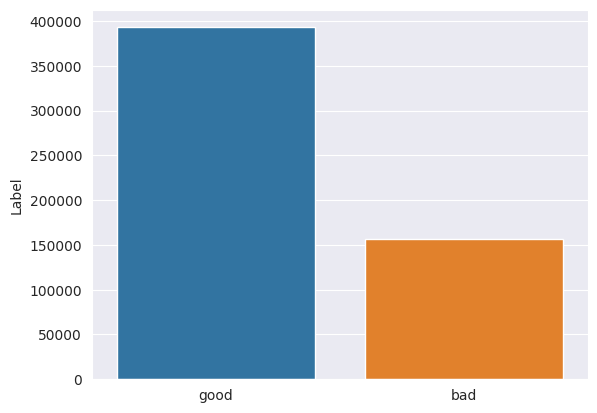

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index,y=label_counts.Label)

**Preprocessing**

*   Now that we have the data, we have to vectorize our URLs. We used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.

**RegexpTokenizer**


*   A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.323659779999957 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
508169,hertrindidnted.com/h/gate.php,bad,"[hertrindidnted, com, h, gate, php]"
544064,dodowiz.com/if0buyzso,bad,"[dodowiz, com, if, buyzso]"
207448,lewisandclarkjournals.unl.edu/read/?_xmlsrc=lc...,good,"[lewisandclarkjournals, unl, edu, read, xmlsrc..."
31243,paypal-handel.de/login/66003/index.php,bad,"[paypal, handel, de, login, index, php]"
327130,facebook.com/family/Fairholm/1,good,"[facebook, com, family, Fairholm]"


**SnowballStemmer**


*   Snowball is a small string processing language, gives root words

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 59.24687609700004 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
209681,louisville.citysearch.com/profile/34104544/lou...,good,"[louisville, citysearch, com, profile, louisvi...","[louisvill, citysearch, com, profil, louisvill..."
375426,linkedin.com/in/hunterjensen,good,"[linkedin, com, in, hunterjensen]","[linkedin, com, in, hunterjensen]"
414397,pitch.com/kansascity/linda-hall-library/Locati...,good,"[pitch, com, kansascity, linda, hall, library,...","[pitch, com, kansasc, linda, hall, librari, lo..."
113300,stsgroupbd.com/aug/ee/secure/cmd-login=2309492...,bad,"[stsgroupbd, com, aug, ee, secure, cmd, login,...","[stsgroupbd, com, aug, ee, secur, cmd, login, ..."
47843,www.reallyfreepacc.za.pl/,bad,"[www, reallyfreepacc, za, pl]","[www, reallyfreepacc, za, pl]"


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.4457407020000801 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
221200,news.silverseek.com/SilverSeek/1320865380.php,good,"[news, silverseek, com, SilverSeek, php]","[news, silverseek, com, silverseek, php]",news silverseek com silverseek php
324851,examiner.com/market-in-austin/longhorns-rank-s...,good,"[examiner, com, market, in, austin, longhorns,...","[examin, com, market, in, austin, longhorn, ra...",examin com market in austin longhorn rank seco...
348969,guerrillaqueenz.com/,good,"[guerrillaqueenz, com]","[guerrillaqueenz, com]",guerrillaqueenz com
382376,manta.com/c/mm0ksmt/casey-s-general-store,good,"[manta, com, c, mm, ksmt, casey, s, general, s...","[manta, com, c, mm, ksmt, casey, s, general, s...",manta com c mm ksmt casey s general store
302220,centredmv.com/equipe_en.aspx,good,"[centredmv, com, equipe, en, aspx]","[centredmv, com, equip, en, aspx]",centredmv com equip en aspx


**Visualization**


*  Visualize some important keys using word cloud

In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


**bold text**
*  **create a function to visualize the important keys from url**

In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

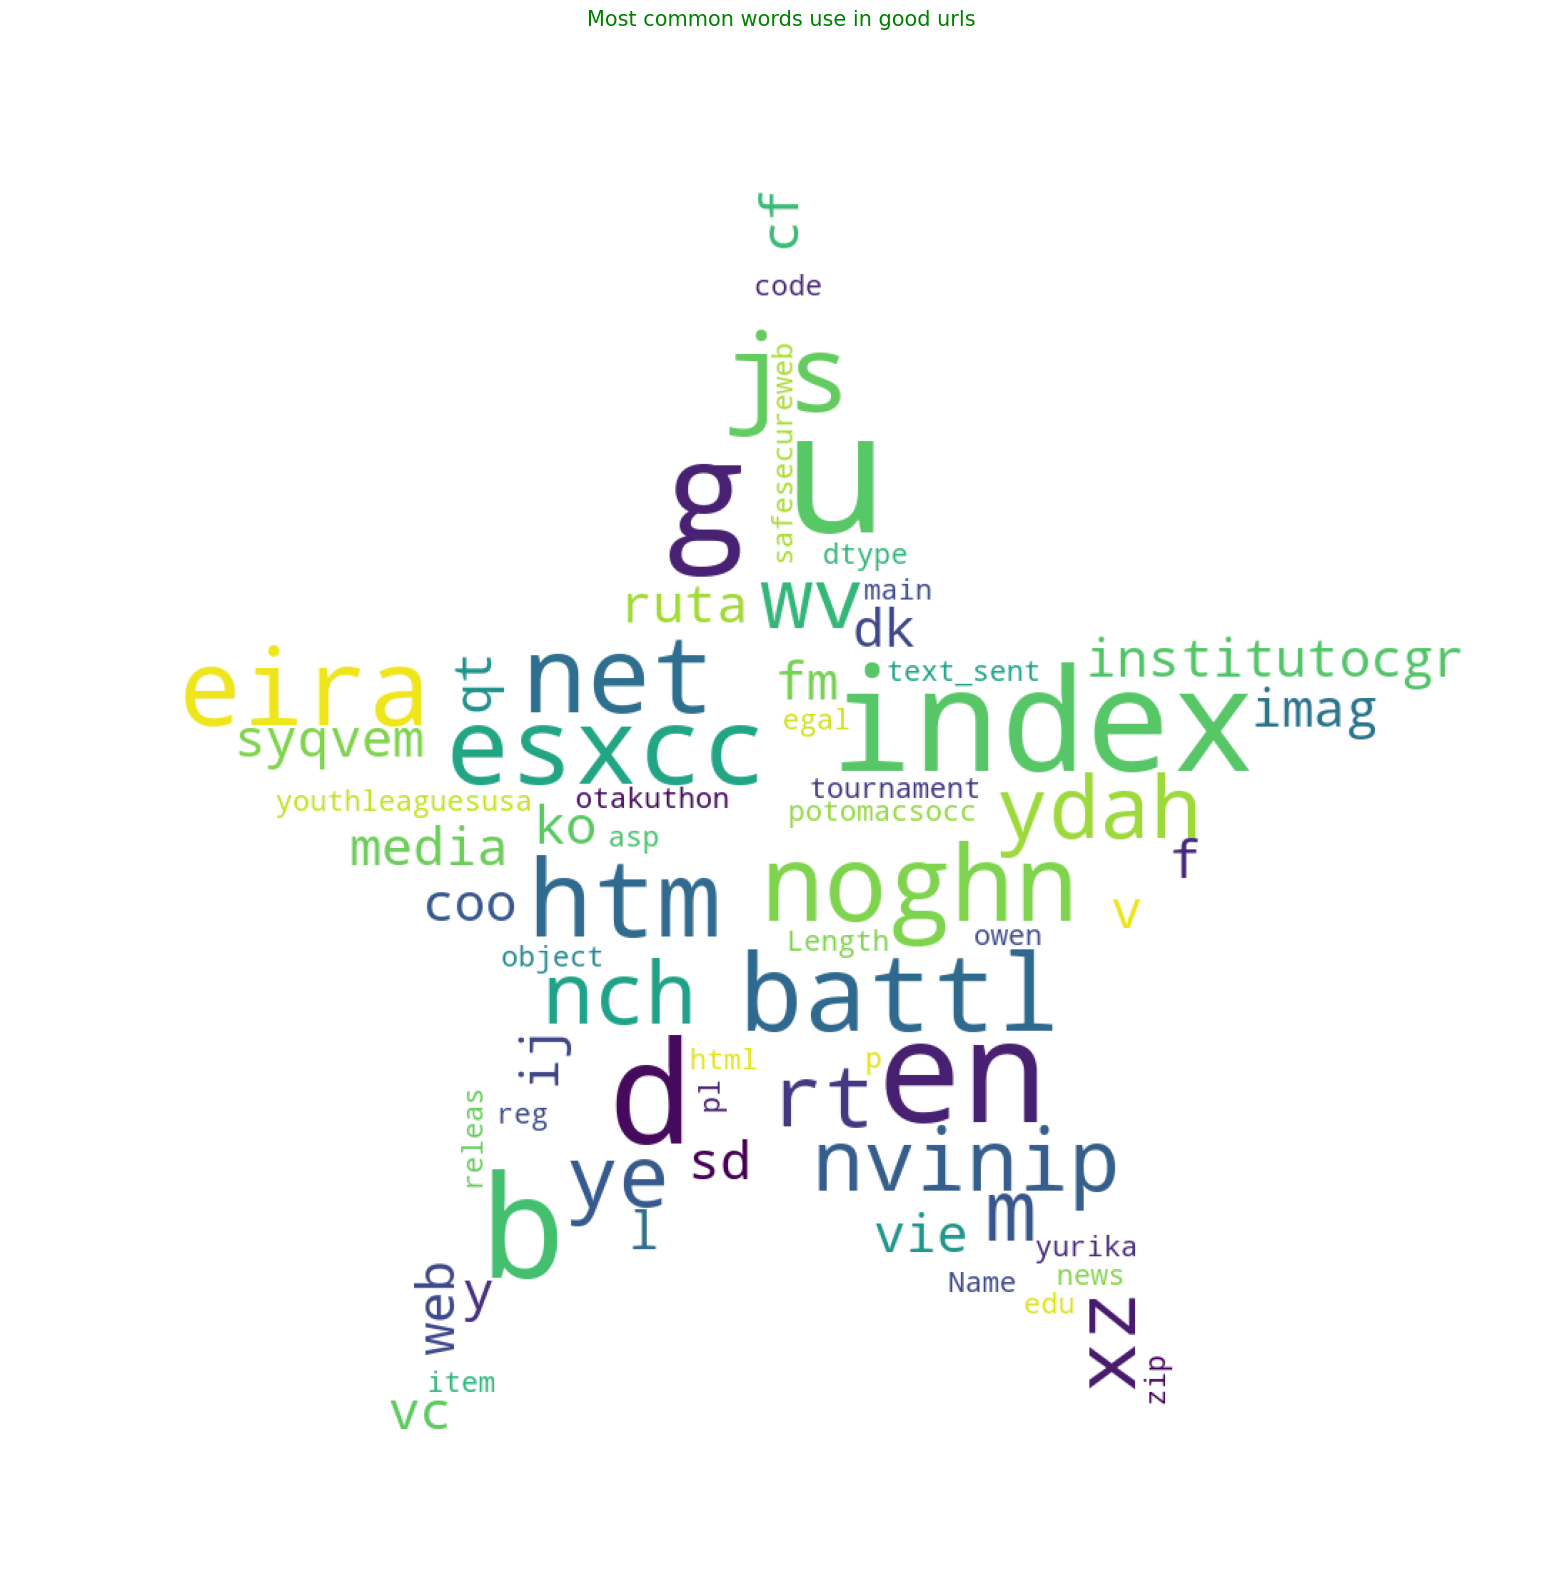

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

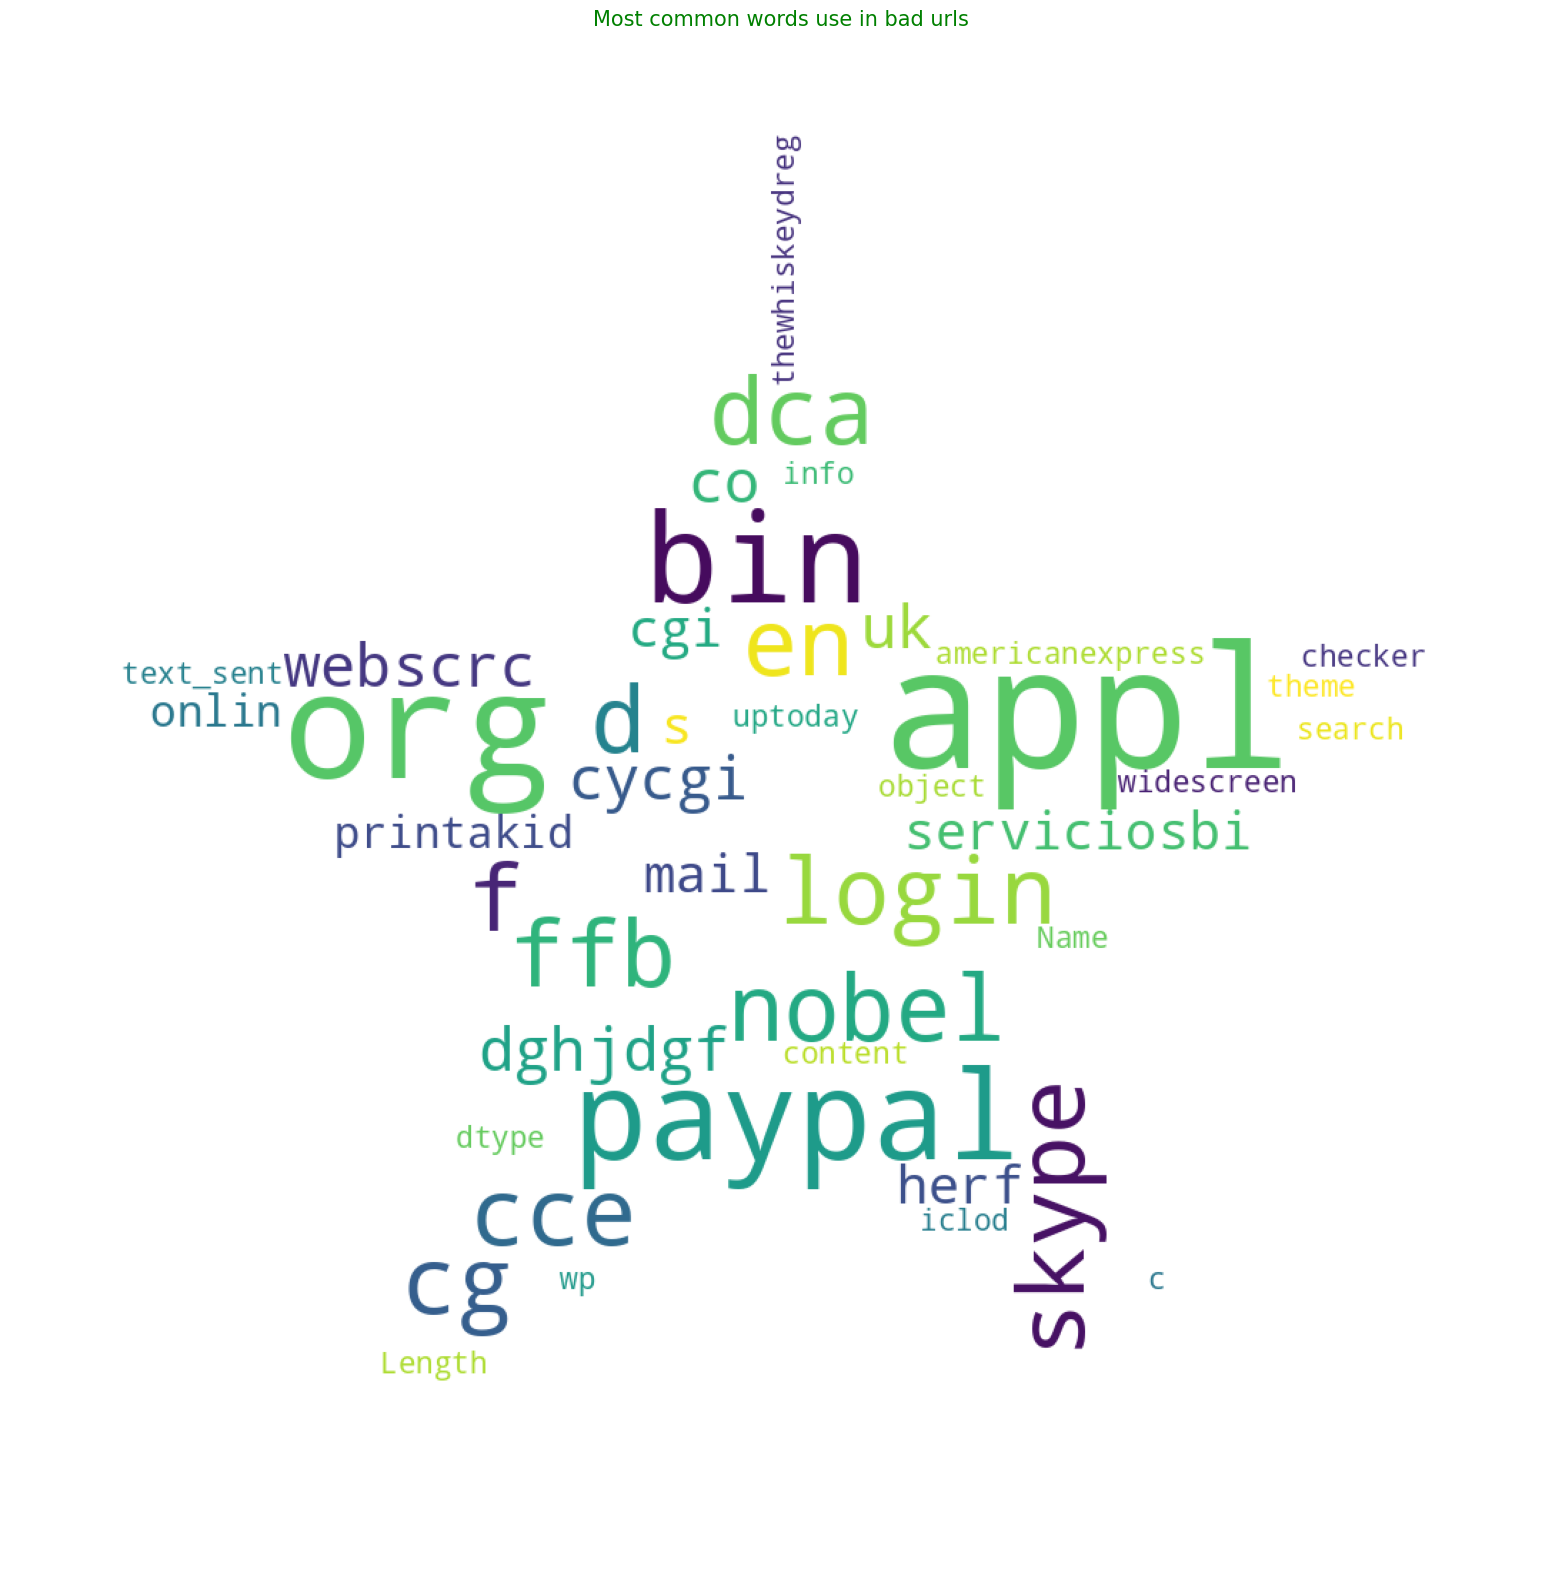

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

**2. Visualize internal links, it will shows all redirect links.**


**Scrape any website**
*   First, setting up the Chrome webdriver so we can scrape dynamic web pages.

**Chrome webdriver**


*   WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more




In [ ]:
pip install selenium


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


In [ ]:
browser = webdriver.Chrome(r"chromedriver.exe")

AttributeError: ignored